In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,  GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('glass.csv', names = ['refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass'])
df

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type of glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


report : 
  * there is no null values present in the columns
  * all the data type are correct with respect to the column 
  

<BarContainer object of 214 artists>

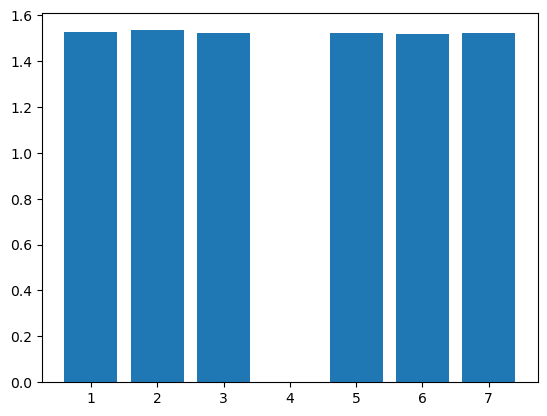

In [5]:
plt.bar( df['Type of glass'], df['refractive index'])

* all most all the glasses having the same refractive index

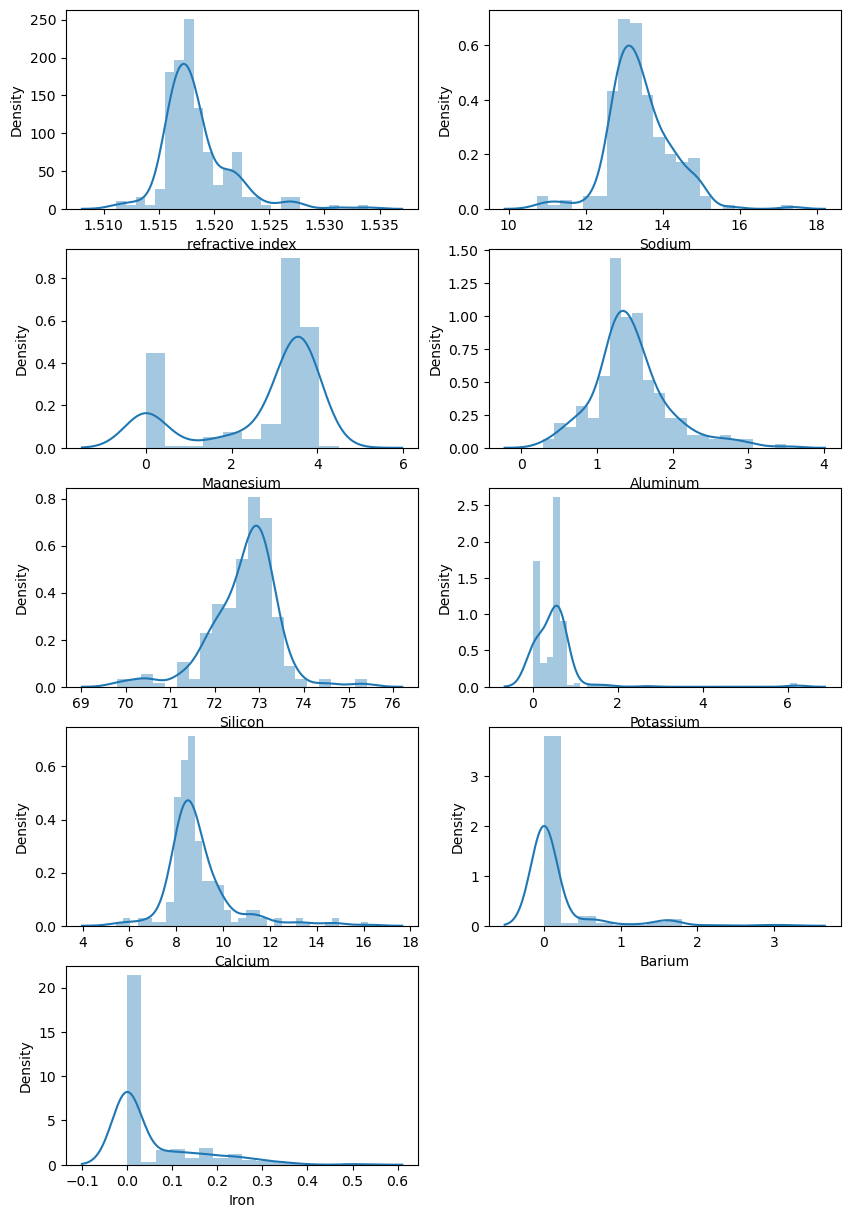

In [6]:
plt.figure(figsize = (10, 15))
a = 1
for i in df:
    if a < 10:
        ax = plt.subplot(5,2, a)
        sns.distplot(df[i])
        a += 1
    

<Axes: >

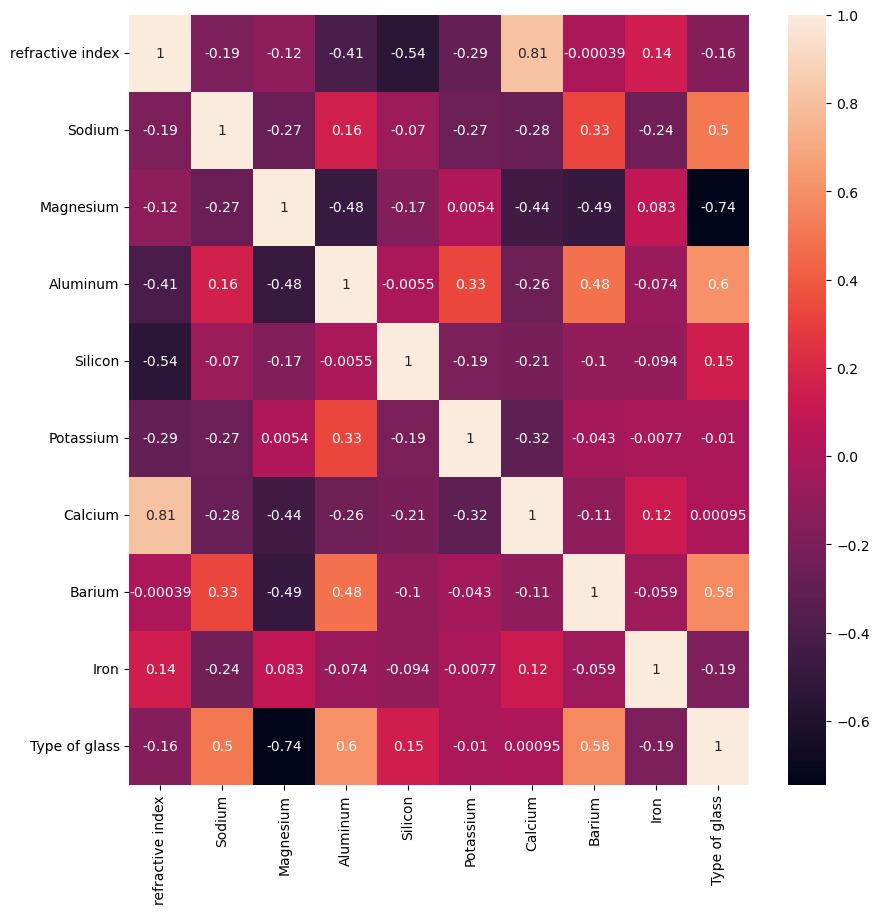

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

* as i observed all the features are co related each other at good stake..

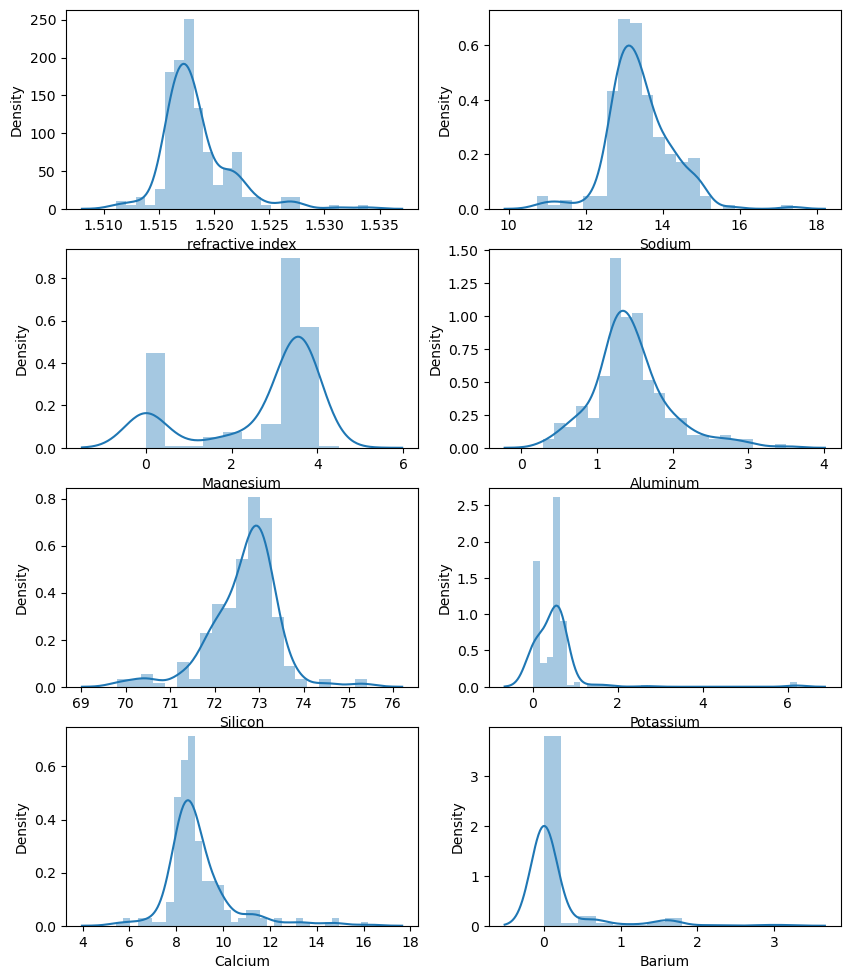

In [8]:
plt.figure(figsize = (10, 15))
a = 1
for i in df:
    if a < 9:
        ax = plt.subplot(5,2, a)
        sns.distplot(df[i])
        a += 1

In [40]:
df.skew()

refractive index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             1.323632
Barium              1.935692
Iron                1.754327
Type of glass       1.114915
dtype: float64

In [39]:
for i in ['Calcium', 'Barium']:
    df[i] = np.sqrt(df[i])

In [11]:
x = df.drop('Type of glass', axis = 1)
y = df['Type of glass']

In [12]:
st = StandardScaler()
xs = st.fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, random_state = 292, test_size = 0.20 )
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [14]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')

for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 64.91%

 ============ test result ==========
test result is: 69.77%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 67.44%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 74.42%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 50.88%

 ============ test result ==========
test result is: 72.09%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 72.09%

================== SVC ==================

 ============ train result 

In [15]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xs, y, cv=10) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.63636364 0.5        0.68181818 0.77272727 0.38095238 0.57142857
 0.71428571 0.52380952 0.57142857 0.76190476]
Mean Cross-Validation Score: 0.6114718614718615
Test Accuracy: 0.6977
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.08620255713278968

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.59090909 0.63636364 0.63636364 0.63636364 0.57142857 0.80952381
 0.71428571 0.28571429 0.57142857 0.57142857]
Mean Cross-Validation Score: 0.6023809523809524
Test Accuracy: 0.7442
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.14180509413067555

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.72727273 0.68181818 0.72727273 0.72727273 0.71428571 0.76190476
 0.85714286 0.47619048 0.80952381 0.85714286]
Mean Cross-Validation Score: 0.733982683982684

according to this i move with RFC for hyperpara meter tuning

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = { 'n_estimators': [50, 100, 150], 'criterion' : ['entropy' , 'gini'],'min_samples_split' : [10,15,20],
            'min_samples_leaf' : [3,5,7], 'max_depth': [15, 10, 20] }

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy: 0.7605042016806723


In [31]:
final = RandomForestClassifier(criterion= 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 5, n_estimators = 150)
final.fit(x_train, y_train)
pred = final.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

81.3953488372093


In [32]:
import joblib

In [41]:
joblib.dump(final, "glass_pred.pkl")

['glass_pred.pkl']

In [42]:
model = joblib.load("glass_pred.pkl")
pred = model.predict(x_test)
ac = accuracy_score(y_test, pred)
ac * 100

81.3953488372093